<div class="alert alert-block alert-warning">

<h1>Housing Price</h1>
    
<a href="https://www.kaggle.com/datasets/yasserh/housing-prices-dataset">Kaggle Link</a>

    
<h2>About Dataset</h2>
<p>Description</p>
<blockquote>A simple yet challenging project, to predict the housing price based on certain factors like house area, bedrooms, furnished, nearness to mainroad, etc. The dataset is small yet, it's complexity arises due to the fact that it has strong multicollinearity. Can you overcome these obstacles and build a decent predictive model?</blockquote>

<p>Objective</p>
<blockquote>
<ul>
    <li>Understand the Dataset and cleanup (if required).</li>
    <li>Build Regression models to predict the sales w.r.t a single and multiple feature.</li>
    <li>Also evaluate the models and compare thier respective scores like R2, RMSE, etc.</li>
</ul>
</blockquote>
</div>

<hr>

<div class="alert alert-block alert-info">
    <h2>Columns</h2>
    <p><strong>price (target):</strong> Price of the Houses.</p>
    <p><strong>area:</strong> Area of houses.</p>
    <p><strong>bedrooms:</strong> Number of house bedrooms.</p>
    <p><strong>bathrooms:</strong> Number of house bathrooms.</p>
    <p><strong>stories:</strong> Number of house stories.</p>
    <p><strong>minroad:</strong> Weather connected to Main Road.</p>
    <p><strong>guestroom:</strong> Weather has a guest room.</p>
    <p><strong>basement:</strong> Weather has a basement.</p>
    <p><strong>hotwaterheating:</strong> Weather has a hotwater heater.</p>
    <p><strong>airconditioning:</strong> Weather has an airconditioning.</p>
    <p><strong>parking:</strong> Number of house parkings.</p>
    <p><strong>prefarea:</strong> Prefarea of the house.</p>
    <p><strong>furnishingstatus:</strong> Furnishing status of the house.</p>
</div>

## Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.columns = map(str.lower,df.columns)

In [4]:
print(df.shape)

(545, 13)


In [5]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [8]:
df.corr()['price'].sort_values(ascending = False)[1:]

area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64

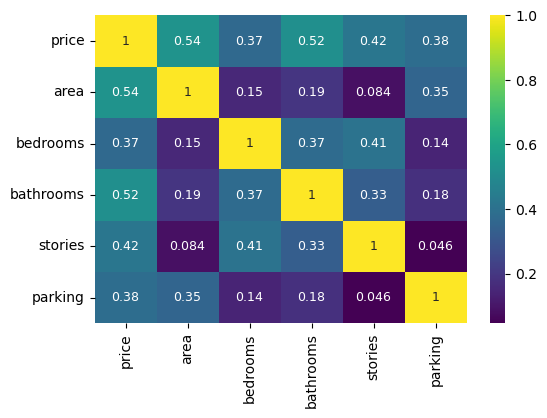

In [9]:
plt.figure(figsize = (6,4))
sns.heatmap(df.corr(),annot = True,annot_kws = {'size':9},cmap = 'viridis')
plt.show()

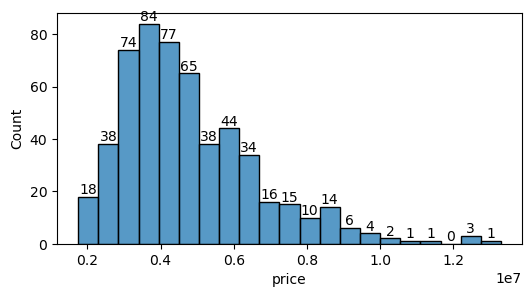

In [10]:
plt.figure(figsize = (6,3))
ax = sns.histplot(x = 'price',data = df)
ax.bar_label(ax.containers[1])
plt.show()

## Create Independent and Dependent Variables

In [11]:
object_cols = df.select_dtypes('object').columns.drop('furnishingstatus')

for col in object_cols:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)

In [12]:
df['furnishingstatus'] = df['furnishingstatus'].apply(
    lambda x: 2 if x == 'furnished' else(1 if x == 'semi-furnished' else 0)
)

In [13]:
X = df.drop('price',axis = 1)
y = df['price']

## Split the Data into the Train and Test Sets

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

## Machine Learning Models

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRFRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [18]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [19]:
def grid_search(estimator,param_grid,algorithmName):
    gridSearch = GridSearchCV(
        estimator=estimator,
        param_grid=param_grid,
        cv=10,
        n_jobs=-1
    )
    gridSearch.fit(X_train,y_train)
    best_params = gridSearch.best_params_
    print(algorithmName.center(50,'_'),end='\n\n')
    print(best_params)

### Random Forest

In [20]:
rf_model = RandomForestRegressor().fit(X_train,y_train)
rf_params = {'n_estimators':[100,500,1000],'max_depth':[None,3,4,5],'min_samples_split':[2,3,4]}
grid_search(rf_model,rf_params,'Random Forest')

__________________Random Forest___________________

{'max_depth': 4, 'min_samples_split': 3, 'n_estimators': 100}


In [21]:
rf_tuned_model = RandomForestRegressor(max_depth=4,min_samples_split=2,n_estimators = 500,random_state=0).fit(X_train,y_train)
rf_pred = rf_tuned_model.predict(X_test)

### Decision Tree

In [22]:
dt_model = DecisionTreeRegressor().fit(X_train,y_train)
dt_params = {'random_state':[0],'max_depth':[None,3,4,5],'min_samples_split':[2,3,4]}
grid_search(dt_model,dt_params,'Decision tree')

__________________Decision tree___________________

{'max_depth': 3, 'min_samples_split': 2, 'random_state': 0}


In [23]:
dt_tuned_model = DecisionTreeRegressor(max_depth=3,min_samples_split=2,random_state=0).fit(X_train,y_train)
dt_pred = dt_tuned_model.predict(X_test)

### XGBoost

In [24]:
xgb_model = XGBRFRegressor().fit(X_train,y_train)
xgb_params = {
    'learning_rate':[0.01, 0.1, 0.5, 1.0],
    'max_depth':[3,4,5],
    'n_estimators':[100,200,500,1000],
    'colsample_bynode':[0.6,0.7,0.8,0.9]
}
grid_search(xgb_model,xgb_params,'XGBRegressor')

___________________XGBRegressor___________________

{'colsample_bynode': 0.6, 'learning_rate': 1.0, 'max_depth': 4, 'n_estimators': 500}


In [25]:
xgb_tuned_model = XGBRFRegressor(colsample_bynode=0.6,learning_rate=1.0,max_depth = 4,n_estimators = 100).fit(X_train,y_train)
xgb_pred = xgb_tuned_model.predict(X_test)

### KNN

In [26]:
knn_model = KNeighborsRegressor().fit(X_train,y_train)
knn_params = {'n_neighbors':np.arange(1,50,2)}
grid_search(knn_model,knn_params,'KNN')

_______________________KNN________________________

{'n_neighbors': 49}


In [27]:
knn_tuned_model = KNeighborsRegressor(n_neighbors=49).fit(X_train,y_train)
knn_pred = knn_tuned_model.predict(X_test)

### Multiple Linear Regression

In [28]:
multiple_lin_reg_model = LinearRegression().fit(X_train,y_train)
mlr_pred = multiple_lin_reg_model.predict(X_test)

## Calculate Scores

In [29]:
def calculate_scores(y_pred,modelName):    
    global df_result,index
    
    r2 = round(r2_score(y_test,y_pred),2)
    mae = round(mean_absolute_error(y_test,y_pred),2)
    rmse = round(np.sqrt(mean_squared_error(y_test,y_pred)),2)
    
    scores = {
        'model':modelName,
        'r2': r2,
        'mae': mae,
        'rmse':rmse
    }
    
    new_df = pd.DataFrame(data = scores,index = [index])
    df_result = pd.concat([df_result,new_df])
    index += 1   

In [30]:
predictions = {
    'Random Forest':rf_pred,
    'Decision Tree':dt_pred,
    'XGB':xgb_pred,
    'KNN':knn_pred,
    'MLR':mlr_pred
}

df_result = pd.DataFrame()
index = 1

for p in predictions:
    calculate_scores(predictions[p],p)
    
df_result.sort_values(by = 'rmse')

,model,r2,mae,rmse
5,MLR,0.64,820961.03,1111278.77
3,XGB,0.59,881659.09,1198051.25
1,Random Forest,0.56,908025.14,1228704.23
2,Decision Tree,0.45,1026079.22,1385136.36
4,KNN,0.38,1111698.65,1467577.89
